# 2. Tải xuống và Cài đặt Prerequisite
**pycountry_convert**: Sử dụng dữ liệu quốc gia lấy từ wikipedia, gói này cung cấp các chức năng chuyển đổi giữa tên quốc gia ISO, mã quốc gia và tên lục địa.

**folium, seaborn, plotly**: Một số gói trực quan hóa trong Python.

Bỏ ghi chú và cài đặt một số gói nếu bạn chưa cài đặt chúng. Nếu không, hãy tiếp tục.

In [1]:

!pip install pycountry_convert
!pip install folium
!pip install seaborn
!pip install plotly

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached tomli-2.0.1-py3-none-any.whl (12 kB)
  Created wheel for pycountry: filename=pycountry-22.3.5-py2.py3-none-any.whl size=10681896 sha256=d036ac003ca8332c8ef3bd5fa0d928c50517537859ac7b20710dd7781c1aa411
  Stored in directory: c:\users\phuongnguyen\appdata\local\pip\cache\wheels\03\57\cc\290c5252ec97a6d78d36479a3c5e5ecc76318afcb241ad9dbe
Successfully built pycountry


You should consider upgrading via the 'C:\Users\PhuongNguyen\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\PhuongNguyen\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\PhuongNguyen\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\PhuongNguyen\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [1]:
#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import pycountry_convert as pc
import folium
from pycountry_convert import country_mappings as cm
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Tải xuống tập dữ liệu và tìm hiểu dữ liệu
Sau khi tải xuống tập dữ liệu, hãy trả lời các câu hỏi sau:
- Xác định ngày đầu tiên bộ dữ liệu bắt đầu lưu trữ số ca Covid của 3 bộ dữ liệu.
- Xác định ngày cuối cùng dữ liệu được cập nhật số ca Covid của 3 bộ dữ liệu.
- Xác định có bao nhiêu quốc gia trong dữ liệu này.
- Tính tổng số ngày có trong 3 bộ dữ liệu
Quan sát xem có quốc gia nào bị trùng lặp trong 3 bộ dữ liệu hay không.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo toàn quốc chứ không theo từng thành phố.
- Xác định những quốc gia có trong 3 bộ dữ liệu được lưu trữ số ca Covid theo từng thành phố.
- Xác định quốc gia và ngày mà có số ca Covid nhiều nhất.
- Xác định quốc gia có tổng số người mất do Covid là nhiều nhất.
- Tính tổng số ca Covid, số ca tử vong, cố ca hồi phục và số ca còn Covid ở thời điểm hiện tại của Việt Nam.

Tập dữ liệu này được cập nhật hàng ngày bởi Johns Hopkins CSSE.

In [2]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
# Khung dữ liệu về số ca Covid
confirmed_df = confirmed_df.loc[:,:"8/4/21"]
# Khung dữ liệu về số ca tử vong
deaths_df = deaths_df.loc[:,:"8/4/21"]
# Khung dữ liệu về số ca hồi phục 
recoveries_df = recoveries_df.loc[:,:"8/4/21"]

## Hãy xem dữ liệu tổng quan:

In [4]:
# Dữ liệu tổng quan về tổng số ca covid
confirmed_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,316088,316189,316328,316487,316603,316738,316861,317083,317264,317404
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,7012,7022,7027,7042,7058,7061,7070,7081,7086,7096
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,192316,192956,193432,194140,195096,195816,196293,196490,197123,197791


In [5]:
# Dữ liệu tổng quát về số ca tử vong
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,991,994,1000,1003,1008,1011,1016,1018,1022,1026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,3599,3600,3601,3601,3601,3603,3604,3609,3609,3609
285,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
286,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1373,1374,1374,1374,1375,1375,1377,1378,1380,1380
287,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3295,3316,3338,3355,3376,3389,3406,3412,3422,3430


In [6]:
# Dữ liệu về số ca hổi phục
recoveries_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,311526,311560,311622,311714,311772,311832,311918,312149,312289,312320
270,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,4166,4168,4168,4171,4171,4185,4200,4212,4232,4251
272,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,182665,183534,183957,185210,186211,187236,188106,188950,189341,189658


#  4. Phân tích Toàn cầu

## Bài toán 1

    Tính tổng số trường hợp mắc, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (theo ngày).

In [7]:
# Nhập mã lập trình của bạn tại đây:   
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []              # List tổng số ca mắc covid
total_deaths = []             # List tổng số ca tử vong
mortality_rate = []           # List tỉ lệ tử vong 
recovery_rate = []            # List tỉ lệ hồi phục
total_recovered = []          # List tổng số ca hồi phục
total_active = []             # List tổng số ca vẫn đang mắc bệnh
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

# total confirmed, total deaths and total recovered cases overtime
total_cases = list(confirmed.sum())                   
total_deaths = list(deaths.sum())                    
total_recovered = list(recoveries.sum())             
    
for i in range(len(adjusted_dates)):
    total_active.append(total_cases[i] - total_deaths[i] - total_recovered[i])      # Total active = total cases - total deaths - total recovered

In [8]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  200758588
Total death cases:  4283016
Total recoveries cases:  130899061
Total active cases:  65576511


## Bài toán 2

    Trực quan hóa số lượng và log(10) tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 2 biểu đồ (một cho số lượng và một cho log(10)) sử dụng biểu đồ đường.

In [9]:
# Create Dataframe includes total_cases, total_deaths, total_recovered, total_active columns:

total = {"date": adjusted_dates,
         "total_cases": total_cases, 
         "total_deaths": total_deaths, 
         "total_recovered": total_recovered, 
         "total_active": total_cases}
total_df = pd.DataFrame(total)
total_df.set_index("date", inplace = True)
total_df


,total_cases,total_deaths,total_recovered,total_active
date,,,,
0,557,17,30,557
1,657,18,32,657
2,944,26,39,944
3,1437,42,42,1437
4,2120,56,56,2120
...,...,...,...,...
556,198389684,4246601,129705211,198389684
557,198872752,4254020,129994389,198872752
558,199443855,4262171,130277533,199443855


Text(0, 0.5, 'Mil. of cases')

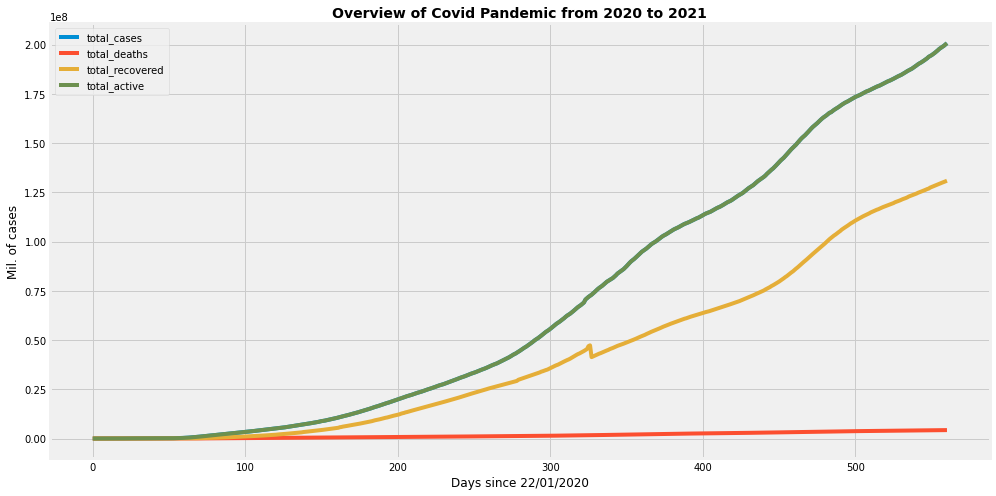

In [10]:

total_df.plot(kind = "line",figsize = (15,8))
plt.title("Overview of Covid Pandemic from 2020 to 2021", fontsize = 14, fontweight = "bold")
plt.xlabel("Days since 22/01/2020")
plt.ylabel("Mil. of cases")

In [11]:
# Calculcate log10 of total cases, total deaths, total recoveries and total active

import math
total_cases_log10 = []
total_deaths_log10 = []
total_recovered_log10 = []
total_active_log10 = []

for i in adjusted_dates:
    total_cases_log10.append(math.log10(total_cases[i]))
    total_deaths_log10.append(math.log10(total_deaths[i]))
    total_recovered_log10.append(math.log10(total_recovered[i]))
    total_active_log10.append(math.log10(total_active[i]))
    
total_log10 = {"date": adjusted_dates,
               "total_cases": total_cases_log10, 
               "total_deaths": total_deaths_log10, 
               "total_recovered": total_recovered_log10, 
               "total_active": total_cases_log10}
total_log10_df = pd.DataFrame(total_log10)
total_log10_df.set_index("date", inplace = True)
total_log10_df


,total_cases,total_deaths,total_recovered,total_active
date,,,,
0,2.745855,1.230449,1.477121,2.745855
1,2.817565,1.255273,1.505150,2.817565
2,2.974972,1.414973,1.591065,2.974972
3,3.157457,1.623249,1.623249,3.157457
4,3.326336,1.748188,1.748188,3.326336
...,...,...,...,...
556,8.297519,6.628041,8.112957,8.297519
557,8.298575,6.628800,8.113925,8.298575
558,8.299821,6.629631,8.114870,8.299821


Text(0, 0.5, 'Log 10 of cases')

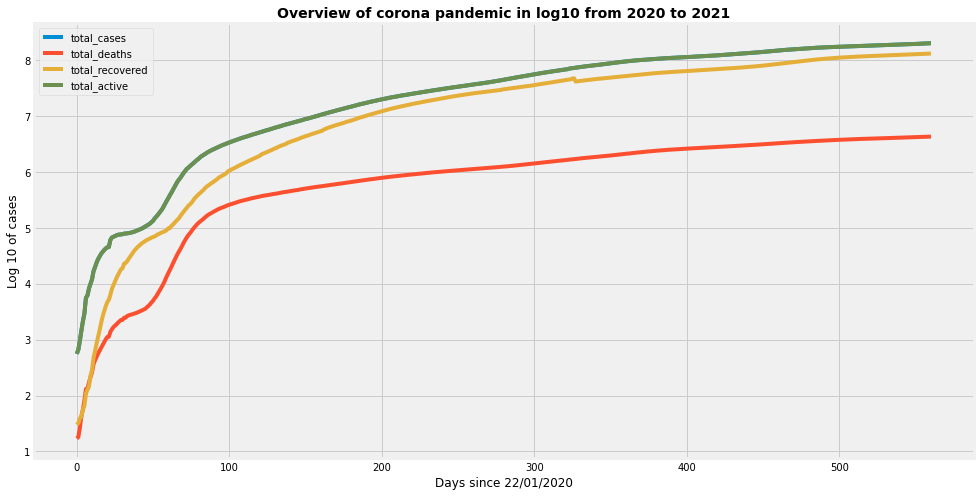

In [12]:
# Adding plot
total_log10_df.plot(kind = "line", figsize = (15,8))

plt.title("Overview of corona pandemic in log10 from 2020 to 2021", fontsize = 14, fontweight = "bold")
plt.xlabel("Days since 22/01/2020")
plt.ylabel("Log 10 of cases")

## Bài toán 3
    Trực quan hóa tổng số ca bệnh, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ được phân tách bằng cách sử dụng biểu đồ đường.

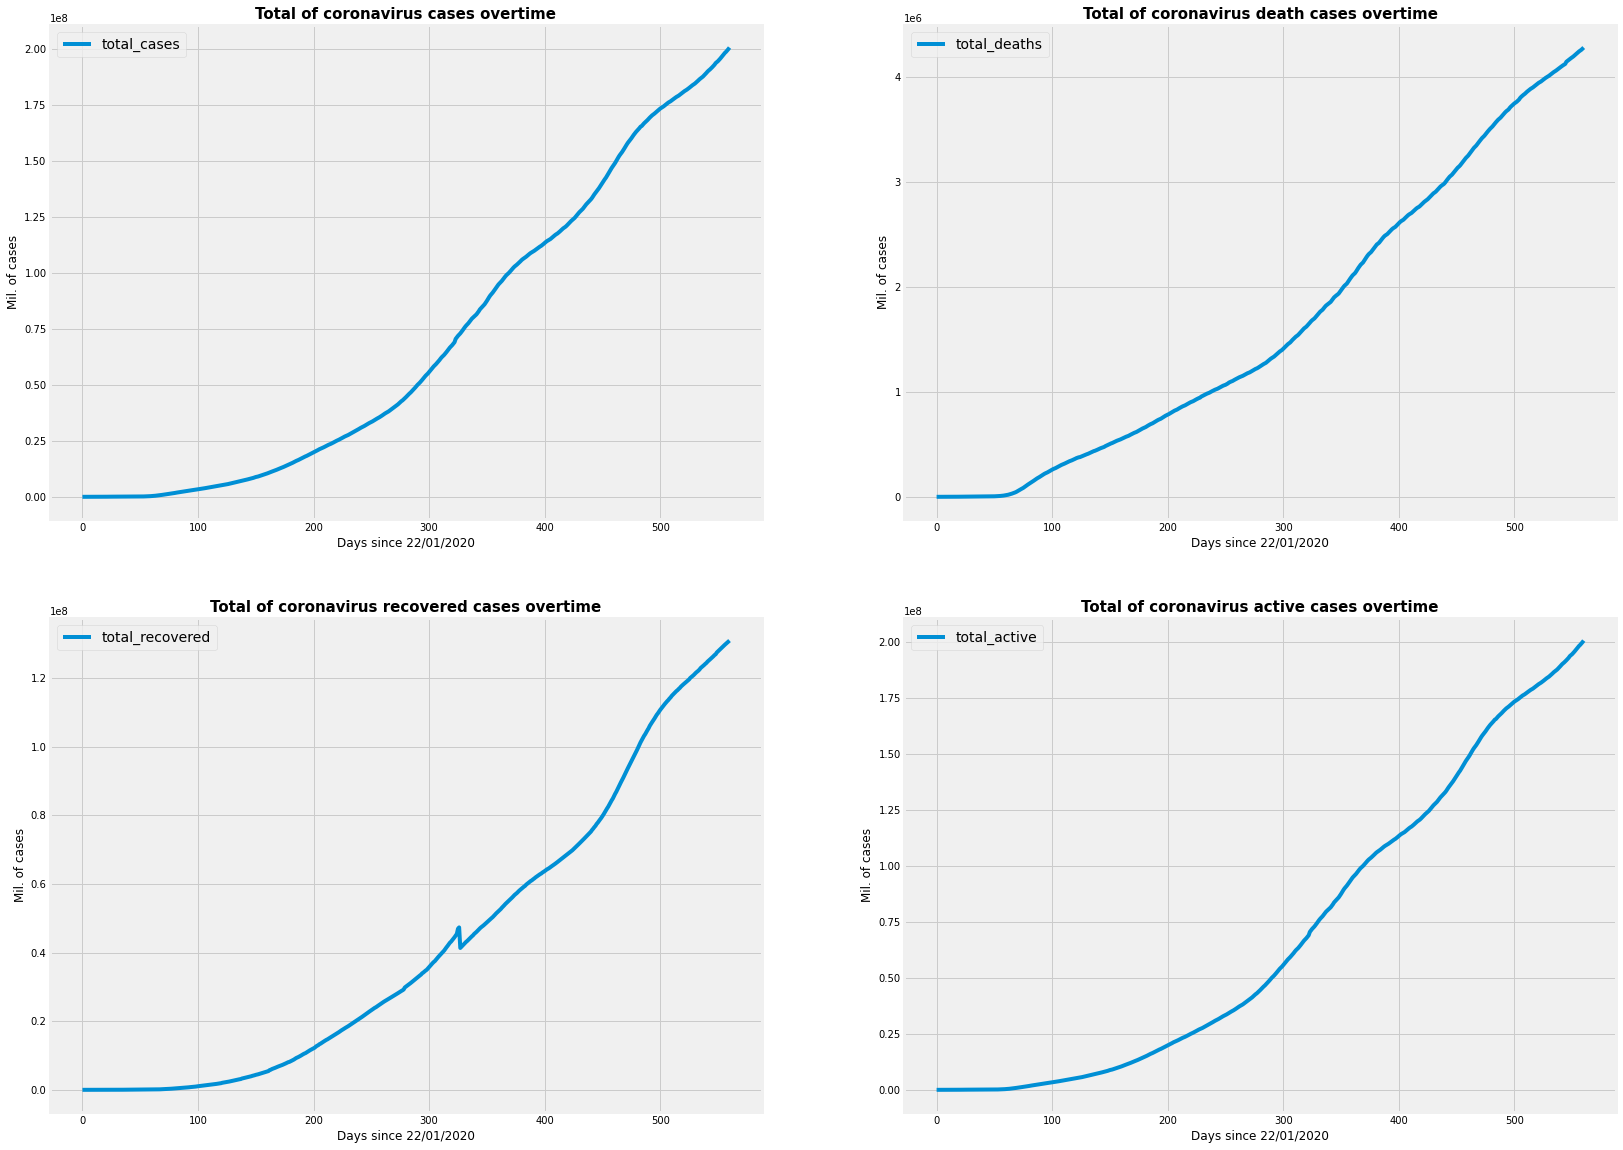

In [15]:
fig = plt.figure()

# Subplot 1: Plot total_cases
ax0 = fig.add_subplot(2,2,1)
total_df["total_cases"].plot(kind = "line", figsize = (25,20))
ax0.set_title("Total of coronavirus cases overtime", fontsize = 15, fontweight = "bold")
ax0.set_xlabel("Days since 22/01/2020")
ax0.set_ylabel("Mil. of cases")
ax0.legend(fontsize = 14)

# Subplot 2: PLot total_deaths
ax1 = fig.add_subplot(2,2,2)
total_df["total_deaths"].plot(kind = "line", figsize = (25,20))
ax1.set_title("Total of coronavirus death cases overtime", fontsize = 15, fontweight = "bold")
ax1.set_xlabel("Days since 22/01/2020")
ax1.set_ylabel("Mil. of cases")
ax1.legend(fontsize = 14)

# Subplot 3: Plot total_recovered
ax2 = fig.add_subplot(2,2,3)
total_df["total_recovered"].plot(kind = "line", figsize = (25,20))
ax2.set_title("Total of coronavirus recovered cases overtime", fontsize = 15, fontweight = "bold")
ax2.set_xlabel("Days since 22/01/2020")
ax2.set_ylabel("Mil. of cases")
ax2.legend(fontsize = 14)

# Subplot 4: Plot total_active
ax3 = fig.add_subplot(2,2,4)
total_df["total_active"].plot(kind = "line", figsize = (25,20))
ax3.set_title("Total of coronavirus active cases overtime", fontsize = 15, fontweight = "bold")
ax3.set_xlabel("Days since 22/01/2020")
ax3.set_ylabel("Mil. of cases")
ax3.legend(fontsize = 14)

## Bài toán 4
    Tính toán số lượng gia tăng hàng ngày trong tổng số trường hợp, tổng số người chết, tổng số người hồi phục và tổng số đang điều trị theo thời gian (đơn vị ngày).

In [15]:
# Use diff() to calculate the difference of total cases, total deaths, total recovered and total active overtime
total_diff_df = total_df.diff()
total_diff_df

,total_cases,total_deaths,total_recovered,total_active
date,,,,
0,NaN,NaN,NaN,NaN
1,100.0,1.0,2.0,100.0
2,287.0,8.0,7.0,287.0
3,493.0,16.0,3.0,493.0
4,683.0,14.0,14.0,683.0
...,...,...,...,...
556,517345.0,8844.0,303929.0,517345.0
557,483068.0,7419.0,289178.0,483068.0
558,571103.0,8151.0,283144.0,571103.0


## Bài toán 5
    Trực quan hóa số lượng gia tăng hàng ngày về tổng số trường hợp, tổng số người chết, tổng số người phục hồi và tổng số đang điều trị theo thời gian (đơn vị ngày) trong 4 biểu đồ riêng biệt bằng cách sử dụng biểu đồ cột.

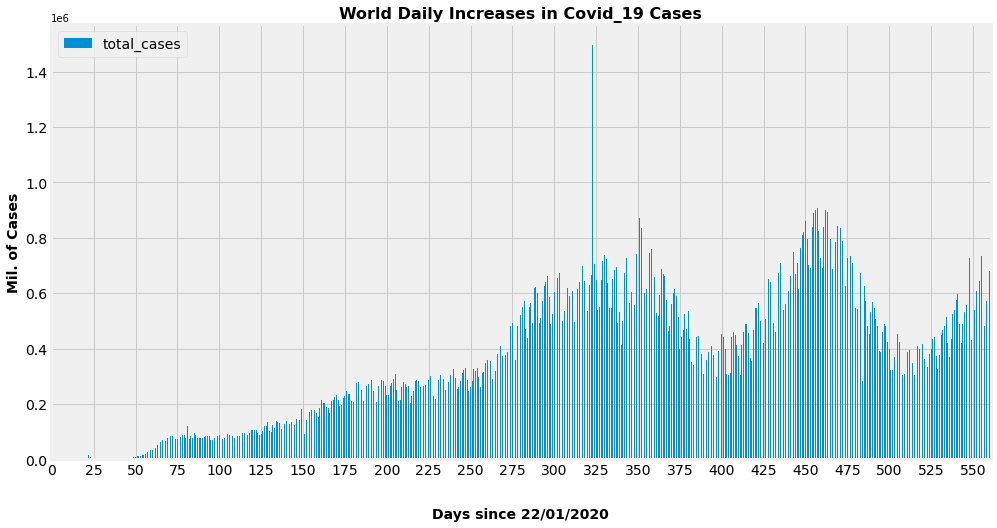

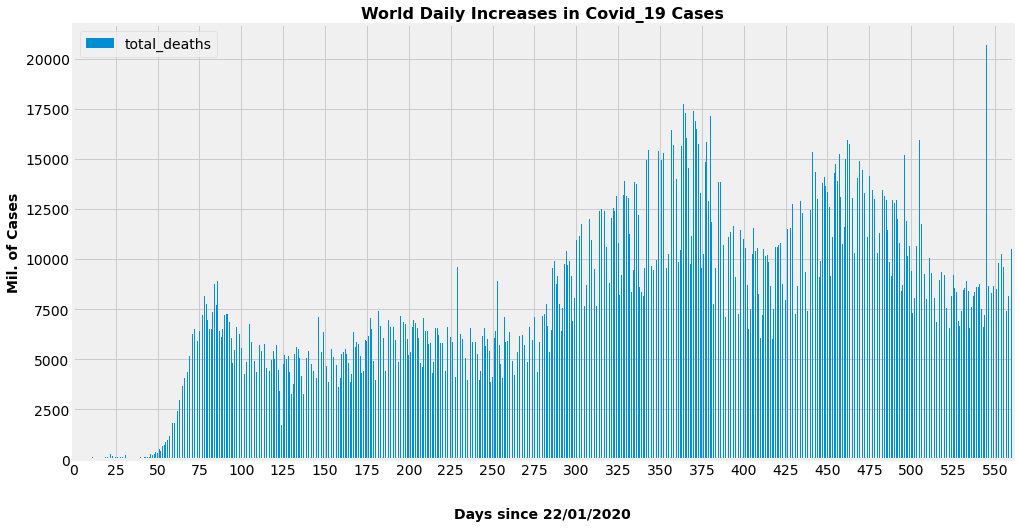

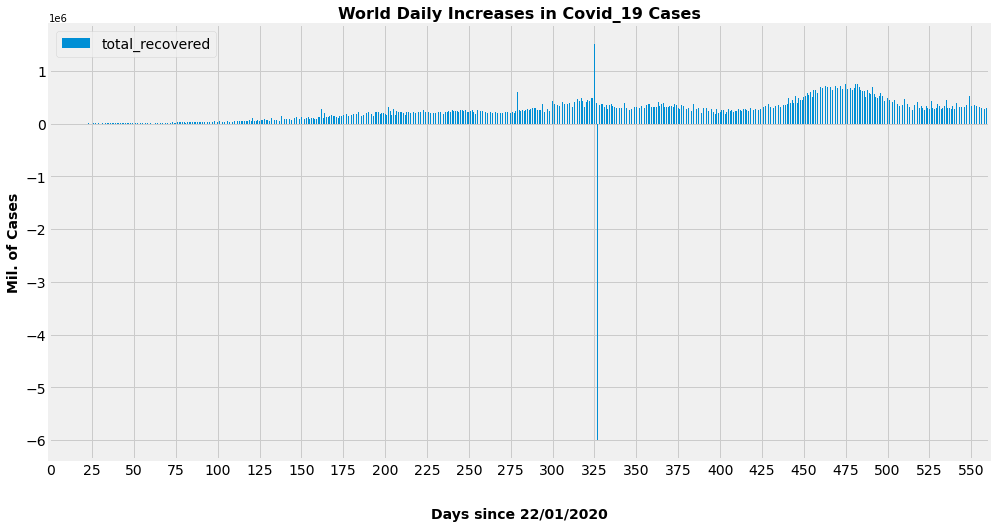

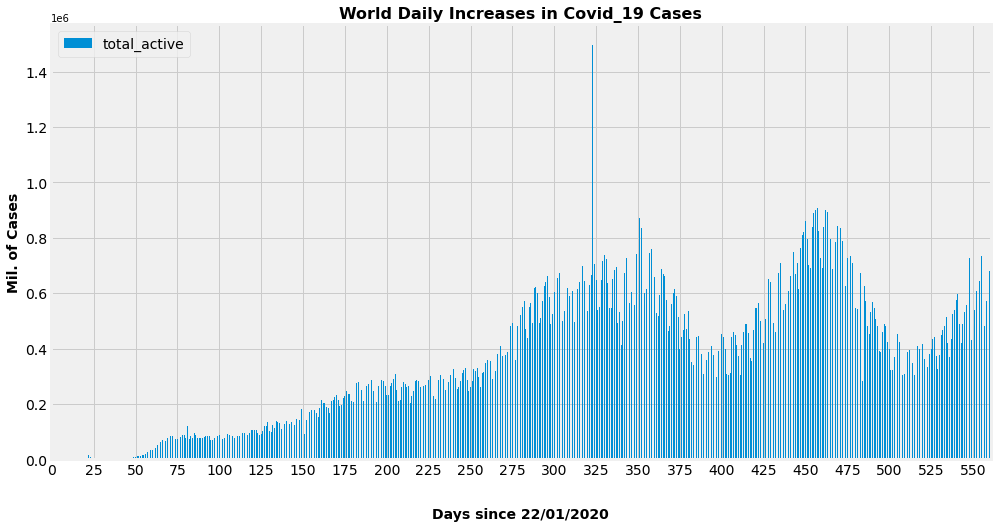

In [16]:
for i in list(total_diff_df.columns):
    # Plot "World daily increases in confirmed cases"
    total_diff_df[i].plot(kind = "bar", figsize = (15,8), width = 0.5)
    
    #Adding plot title
    plt.title("World Daily Increases in Covid_19 Cases", fontsize = 16, fontweight = "bold")
    # Customize x-axes
    plt.xlabel("Days since 22/01/2020", loc= "center", labelpad=30, fontsize = 14, fontweight = "bold")
    plt.xticks([i for i in range(0, 561, 25)], [i for i in range(0, 561, 25)], fontsize = 14, rotation = 0)
    # Customize y-axes
    plt.ylabel("Mil. of Cases", fontsize = 14, fontweight = "bold")
    plt.yticks(fontsize = 14)
    # Legend of plot
    plt.legend(loc = "upper left", fontsize = 14)

    plt.show()

# Bài toán 6:
    Tính tỷ lệ tử vong toàn cầu và tỷ lệ hồi phục theo phần trăm theo thời gian.

In [17]:
#Nhập mã lập trình của bạn tại đây:
mortality_rate = []         # List of mortality rate
recovery_rate = []          # List of recovery rate

# Calculate mortality and recovery rate
for i in range(len(adjusted_dates)):
    mortality_rate.append((total_deaths[i]/total_cases[i])*100)
    recovery_rate.append((total_recovered[i]/total_cases[i])*100)
    
# Dataframe change_rate includes mortality and recovery rate
change_rate = pd.DataFrame([mortality_rate, recovery_rate]).transpose()
change_rate = change_rate.set_axis(["mortality_rate", "recovery_rate"], axis = 1)
change_rate


,mortality_rate,recovery_rate
0,3.052065,5.385996
1,2.739726,4.870624
2,2.754237,4.131356
3,2.922756,2.922756
4,2.641509,2.641509
...,...,...
556,2.140535,65.379010
557,2.139066,65.365611
558,2.137028,65.320405
559,2.135428,65.265505


# Bài toán 7
**7.1**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

In [18]:
# Mean of mortality rate
avg_mortality_rate = []
for i in range(len(adjusted_dates)):
    avg_mortality_rate.append(round(change_rate["mortality_rate"].mean(),3))
    
# Mean of recovery rate
avg_recovered_rate = []
for i in range(len(adjusted_dates)):
    avg_recovered_rate.append(round(change_rate["recovery_rate"].mean(),3))
    
# Dataframe avg_rate includes the average of mortality and recovery rate
avg_rate = pd.DataFrame([avg_mortality_rate,avg_recovered_rate]).transpose()
avg_rate = avg_rate.set_axis(["avg_mortality_rate","avg_recovered_rate"], axis = 1)
avg_rate.head(1)

,avg_mortality_rate,avg_recovered_rate
0,3.438,52.716


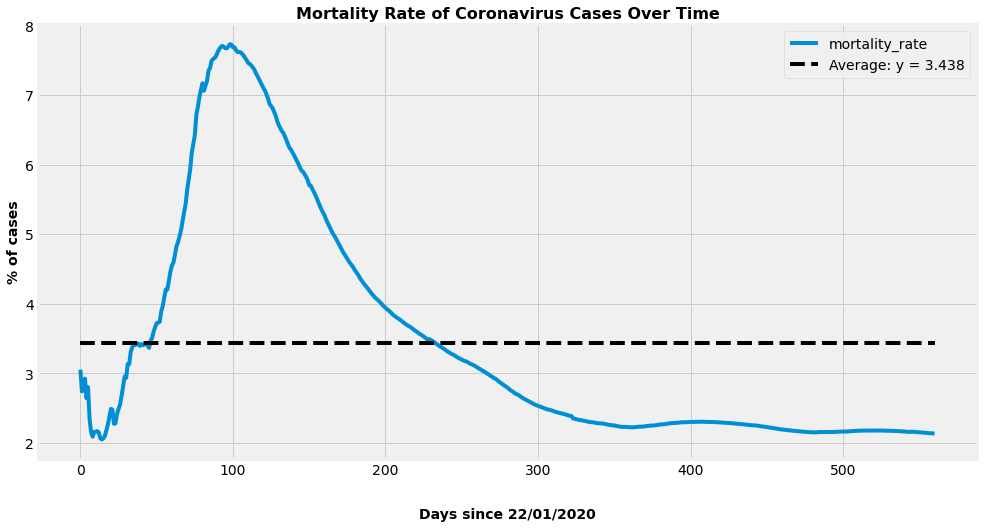

In [19]:
# Plotting mortality rate overtime
change_rate["mortality_rate"].plot(kind = "line", figsize = (15,8), label = "mortality_rate")
avg_rate["avg_mortality_rate"].plot(kind = "line", color = "black", linestyle ="--", label = "Average: y = 3.438")

# Adding title
plt.title("Mortality Rate of Coronavirus Cases Over Time", fontsize = 16, fontweight = "bold")    
# Customize x-axes
plt.xlabel("Days since 22/01/2020", fontsize = 14, fontweight = "bold", labelpad = 30)
plt.xticks(fontsize = 14)

# Customize y-axes
plt.ylabel("% of cases", fontsize = 14, fontweight = "bold")
plt.yticks(fontsize = 14)

# Legend of plot
plt.legend(labels = ["mortality_rate", "Average: y = 3.438"], loc = "upper right", fontsize = 14)

plt.show()

**7.2**

    Trực quan hóa tỷ lệ tử vong theo thời gian (đơn vị ngày) bằng biểu đồ đường.

    Sử dụng đường gạch ngang để trực quan hóa tỷ lệ tử vong trung bình mọi lúc.

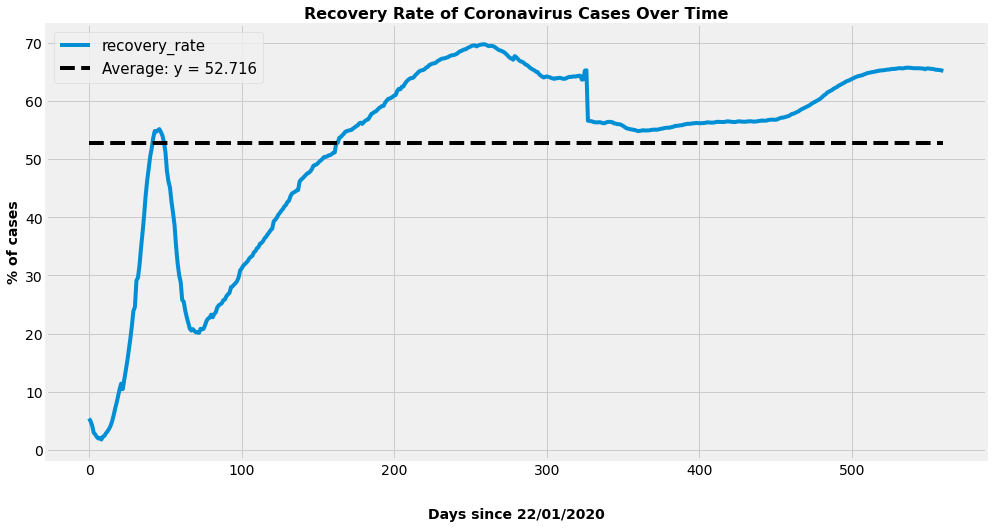

In [20]:
# Plotting recovery rate overtime
change_rate["recovery_rate"].plot(kind = "line", figsize = (15,8), label = "recovery_rate")
avg_rate["avg_recovered_rate"].plot(kind = "line", color = "black", linestyle ="--", label = "Average: y = 52.716")

# Adding title
plt.title("Recovery Rate of Coronavirus Cases Over Time", fontsize = 16, fontweight = "bold")

# Customize x-axes
plt.xlabel("Days since 22/01/2020", fontsize = 14, fontweight = "bold", labelpad = 30)
plt.xticks(fontsize = 14)

# Customize y-axes
plt.ylabel("% of cases", fontsize = 14, fontweight = "bold")
plt.yticks(fontsize = 14)

# Legend of plot
plt.legend(labels = ["recovery_rate", "Average: y = 52.716"], loc = "upper left", fontsize = 15)

plt.show()

#  5. Phân tích theo lục địa

## Tiền xử lý dữ liệu

In [21]:
# Changing the country names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America',
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Define Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Bài toán 8
    Thêm trường "continent" vào tập dữ liệu confirm_df, death_df và recorveries_df:

In [22]:
# Function for adding "continent"
def insert_continent(df):
    continent = []
    for i in range(0,df.shape[0]):
        cont = country_to_continent_code(df["Country/Region"][i])
        if cont in continents.keys():
            continent.append(continents[cont])
    
    df.insert(2,"continent",continent)        # Adding "continent" in the 2.position of data frame
    return(df)

In [23]:
# Insert "continent" to data frame confirmed_df
insert_continent(confirmed_df)
confirmed_df.head()

,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,144285,145008,145552,145996,146523,147154,147501,147985,148572,148933
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,132891,132922,132952,132999,133036,133081,133121,133146,133211,133310
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,163660,165204,167131,168668,170189,171392,172564,173922,175229,176724
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,14577,14586,14586,14655,14678,14678,14678,14747,14766,14797
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,41879,42110,42288,42486,42646,42777,42815,42970,43070,43158


In [24]:
# Insert "continent" to data frame deaths_df
insert_continent(deaths_df)
deaths_df.head()

,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,6477,6515,6577,6615,6677,6708,6737,6774,6804,6836
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,2456,2456,2457,2457,2457,2457,2457,2457,2457,2457
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,4087,4112,4161,4189,4219,4254,4291,4329,4370,4404
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,127,127,127,127,128,128,128,128,128,128
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,991,994,1000,1003,1008,1011,1016,1018,1022,1026


In [25]:
# Insert "continent" to data frame recoveries_df
insert_continent(recoveries_df)
recoveries_df.head()

,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/26/21,7/27/21,7/28/21,7/29/21,7/30/21,7/31/21,8/1/21,8/2/21,8/3/21,8/4/21
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,82586,82586,82586,82586,82586,82586,82586,82586,82586,82586
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,130152,130166,130174,130187,130205,130222,130243,130256,130291,130314
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,111322,112050,112900,113707,114531,115276,116009,116770,117557,118409
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,14077,14113,14113,14180,14210,14210,14210,14296,14348,14380
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,35686,35742,35964,36025,36708,37255,37397,38360,39389,39582


# Bài toán 9
    Tạo khung dữ liệu country_df với chỉ mục là trường "Country/Region".
    Các thông tin cột này sẽ là:
    - continent: Lục địa của quốc gia.
    - Deaths: Tổng số ca dương tính.
    - Deaths: Tổng số người chết.
    - Recoveries: Tổng số ca hồi phục
    - Active: Tổng số đang điều trị.
    - Mortality Rate: Tỉ lệ tử vong tính theo phần trăm.

In [26]:
# Checking for duplicates in column "Country/Region" 
confirmed_df["Country/Region"].value_counts()

Country/Region
China             34
Canada            16
United Kingdom    15
France            12
Australia          8
                  ..
Guinea             1
Guinea-Bissau      1
Guyana             1
Haiti              1
Zimbabwe           1
Name: count, Length: 201, dtype: int64

Có thể nhận thấy có một số giá trị trùng lặp trong cột `Country/Region`. Ví dụ: China với 34 dòng dữ liệu, United Kingdom với 15 dòng dữ liệu. Để xác định được chính xác tổng số ca nhiễm covid, tổng số ca tử vong, tổng số ca hồi phục, tổng số ca đang điều trị theo từng quốc gia, dùng **groupby()** và **sum()** để tính toán.

In [28]:
# Create dataframe country_df
country_df = pd.DataFrame(columns = ["continent","Confirmed", "Deaths", "Recoveries"])

country_df["Confirmed"] = confirmed_df.iloc[:, -1].groupby(confirmed_df["Country/Region"]).sum()
country_df["Deaths"] = deaths_df.iloc[:, -1].groupby(deaths_df["Country/Region"]).sum()
country_df["Recoveries"] = recoveries_df.iloc[:, -1].groupby(recoveries_df["Country/Region"]).sum()
country_df["Active"] = country_df["Confirmed"] - country_df["Deaths"] - country_df["Recoveries"]
country_df["Mortality Rate"] = round((country_df["Deaths"]/country_df["Confirmed"])*100,2)

# Dataframe continent
continent = confirmed_df[["Country/Region", "continent"]].drop_duplicates().set_index("Country/Region")
country_df["continent"] = continent["continent"]

# Transform type of columns Recoveries and Active to integer
country_df[["Recoveries","Active"]] = country_df[["Recoveries","Active"]].fillna(0).astype("int")
country_df

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
Afghanistan,Asia,148933,6836,82586,59511,4.59
Albania,Europe,133310,2457,130314,539,1.84
Algeria,Africa,176724,4404,118409,53911,2.49
Andorra,Europe,14797,128,14380,289,0.87
Angola,Africa,43158,1026,39582,2550,2.38
...,...,...,...,...,...,...
West Bank and Gaza,Others,317404,3609,312320,1475,1.14
Winter Olympics 2022,Others,0,0,0,0,NaN
Yemen,Asia,7096,1380,4251,1465,19.45


# Bài toán 10
    Tạo khung dữ liệu Continental_df với chỉ mục là trường "continent".
    Các thông tin cột này sẽ là:

     - Confirmed: Đất nước lục địa.
     - Deaths: Tổng số người chết.
     - Recoveries: Tổng số lần khôi phục.
     - Active: Tổng số đang điều trị.
     - Mortality Rate: Tỷ lệ tử vong tính theo phần trăm.

In [29]:
# Create dataframe continental_df
Continental_df = pd.DataFrame(columns = ["Confirmed", "Deaths", "Recoveries"])

# Total confirmed, total deaths and total recovered cases grouped by "continent"
Continental_df["Confirmed"] = confirmed_df.iloc[:,-1].groupby(confirmed_df["continent"]).sum()
Continental_df["Deaths"] = deaths_df.iloc[:,-1].groupby(deaths_df["continent"]).sum()
Continental_df["Recoveries"] = recoveries_df.iloc[:,-1].groupby(recoveries_df["continent"]).sum()

# Adding "Active" and "Mortality Rate"
Continental_df["Active"] = Continental_df["Confirmed"] - Continental_df["Deaths"] - Continental_df["Recoveries"]
Continental_df["Mortality Rate"] = round((Continental_df["Deaths"]/Continental_df["Confirmed"])*100,2)

# Transform type of columns Recoveries and Active to integer
Continental_df[["Recoveries","Active"]] = Continental_df[["Recoveries","Active"]].fillna(0).astype("int")
Continental_df

,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,6855602,174000,5955131,726471,2.54
Asia,62536726,902952,57853343,3780431,1.44
Australia,90000,1425,55290,33285,1.58
Europe,52448545,1167140,27947075,23334330,2.23
North America,42351963,924518,5776939,35650506,2.18
Others,753558,16614,654615,82329,2.20
South America,35722194,1096367,32656668,1969159,3.07


## Biểu đồ đường mẫu
Dưới đây là các hàm mẫu để trực quan hóa các trường hợp sinh động theo thời gian ở mỗi châu lục / quốc gia:

In [30]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')

    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})

    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)

def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()

# Bài toán 11
**11.1**

  Áp dụng hàm visual_covid_case để hiển thị trực quan hóa về Covid của 7 lục địa trong 7 biểu đồ đường được riêng biệt. Thứ tự hiển thị được sắp xếp theo thứ tự giảm dần theo số ca được xác nhận.
    

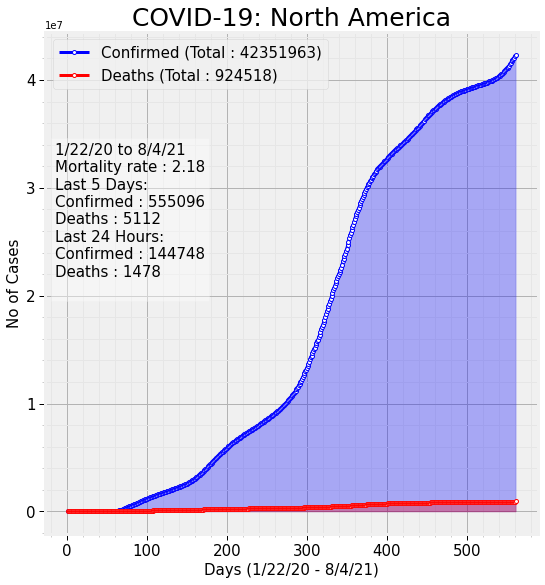

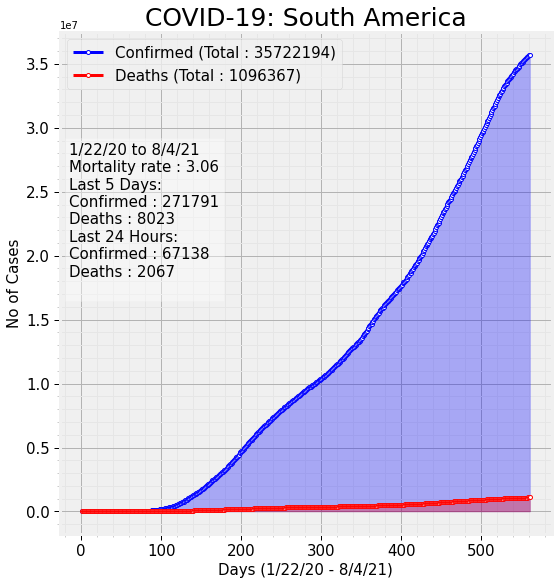

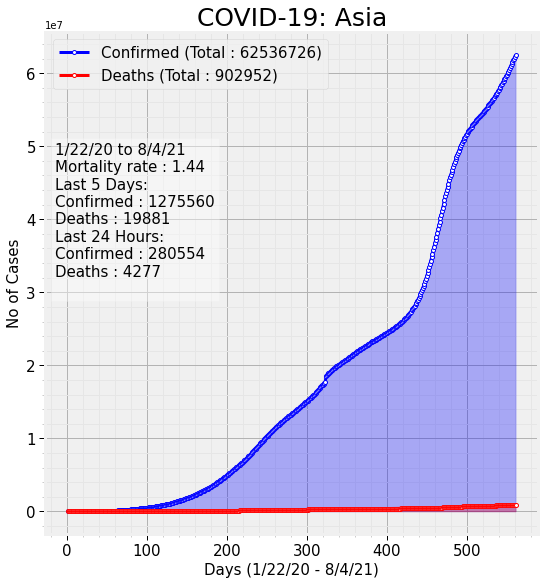

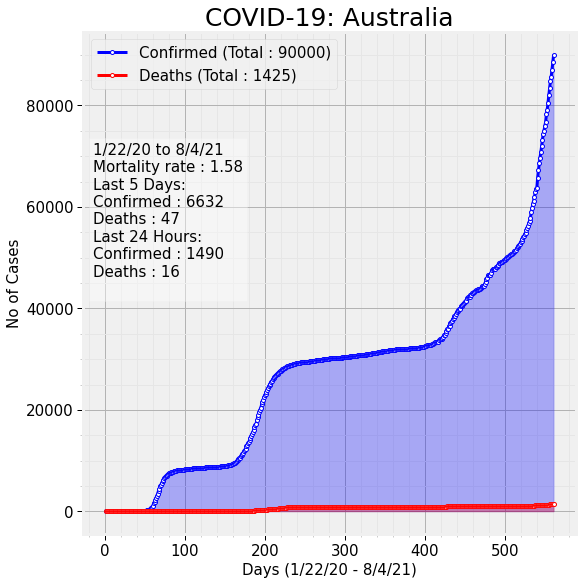

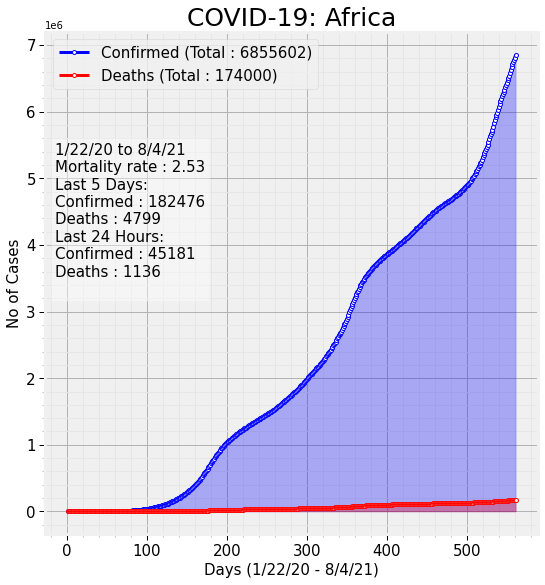

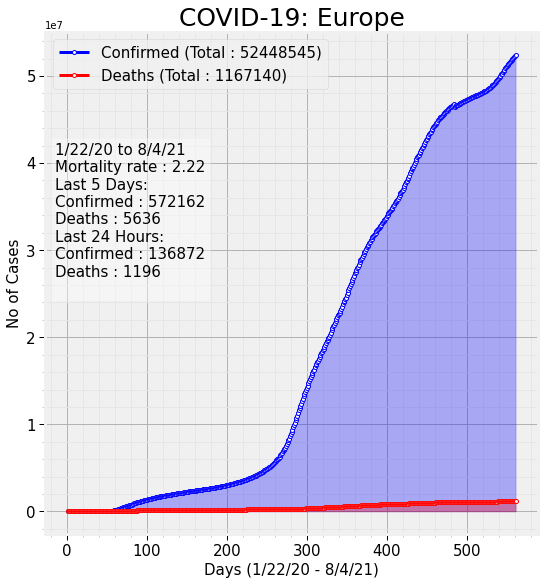

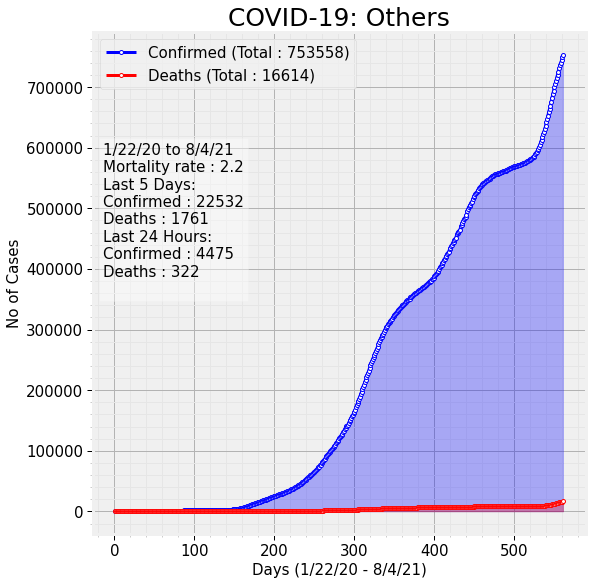

In [31]:
# List of continents will be plotted
lst_continent = list(continents.values())

# Plotting
for i in range(len(lst_continent)):
    visualize_covid_cases(confirmed_df, deaths_df,
                          continent = lst_continent[i] , country = None , state = None, period = None, figure = None, scale = "linear")


**11.2**

    Sử đổi "plot_params" và hàm "visualize_covid_cases" để:
    - Hiển thị kết quả của 7 ngày gần nhất thay vì 5 ngày.
     - Thêm "Recoveries line" vào biểu đồ chính.
     - Thêm số "Total Recoveries" vào bảng nhỏ.
     - Thêm "Recoveries" được nộp trong 7 ngày và 24 giờ qua vào menu thông tin.

In [32]:
#Nhập mã lập trình của bạn tại đây:
def visualize_covid_cases(confirmed, deaths, recoveries,                          # Adding data frame recoveries
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)

    stats = [confirmed, deaths, recoveries]            # Adding data frame recoveries
    label = ["Confirmed", "Deaths", "Recoveries"]       
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else:
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]        # Determine total recovered cases based on input
        
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]

    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"             # Total recovered cases in 7 days
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"             # Total recovered cases in 24 hours

    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))

    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]

    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)

    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})

    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)

    if figure == None:
        plt.show()

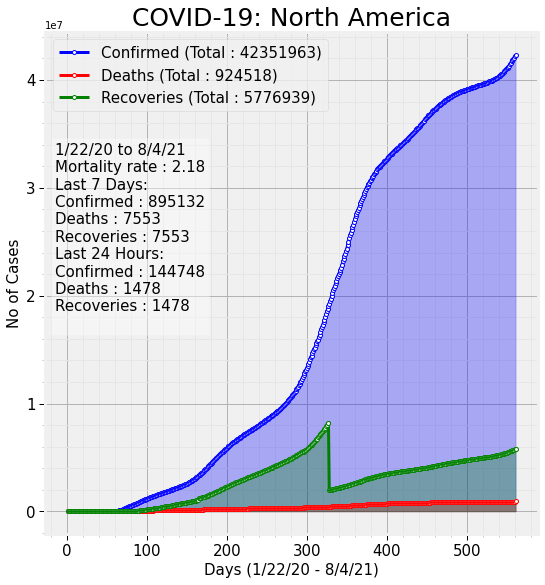

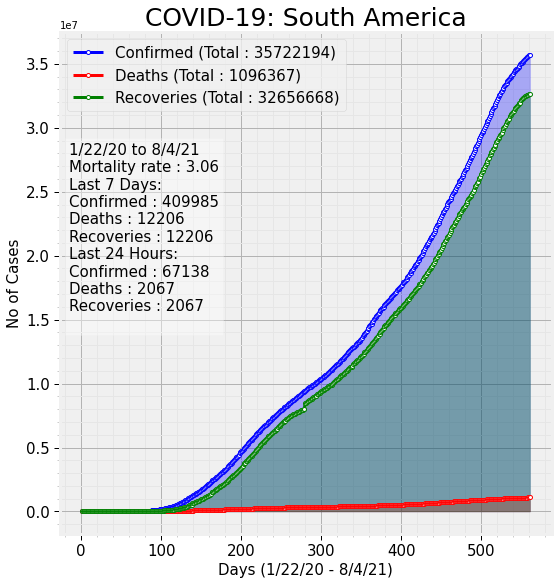

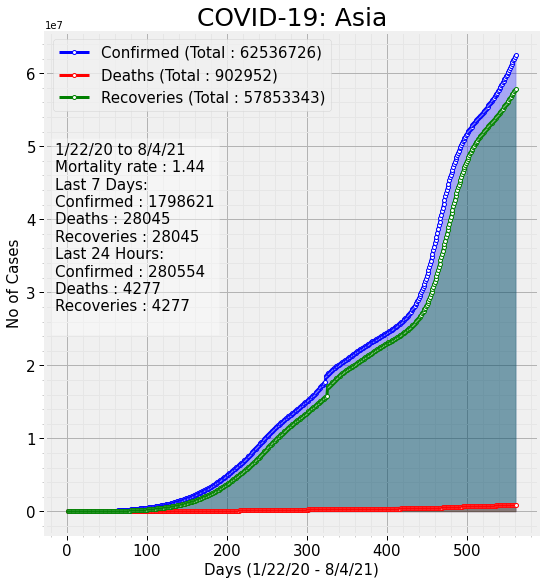

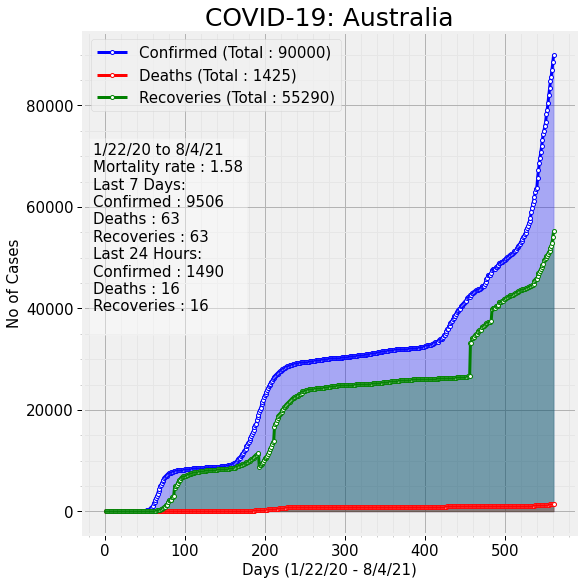

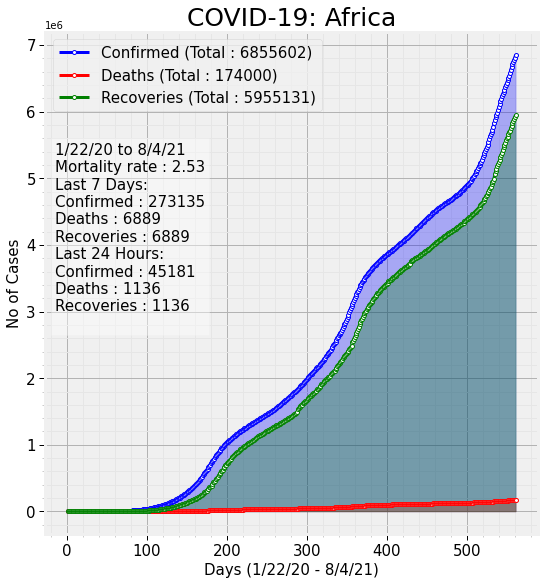

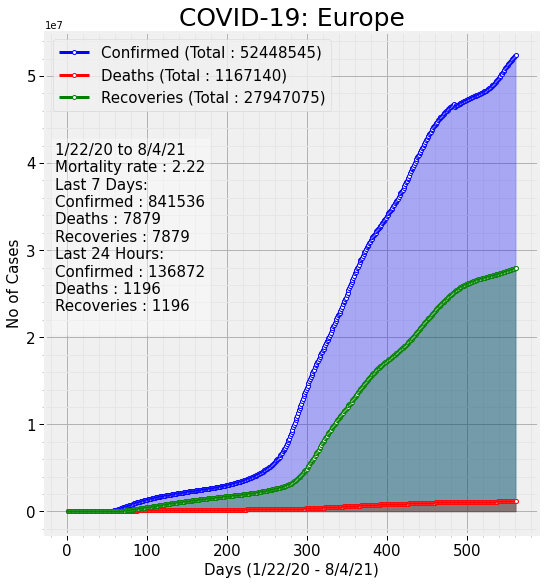

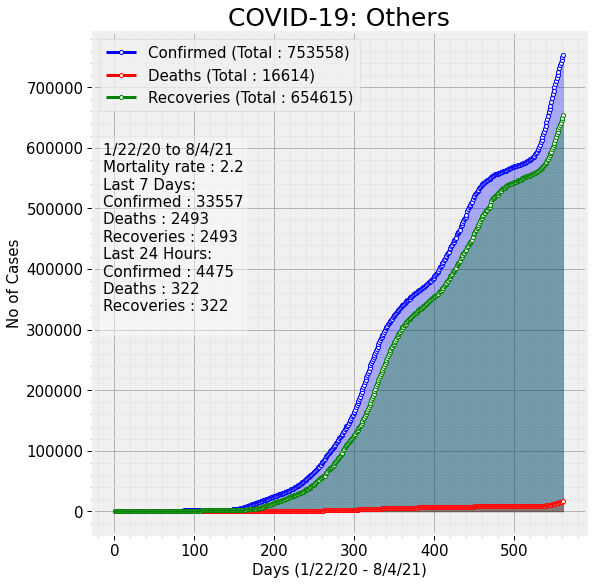

In [33]:
# Plotting
for i in range(len(lst_continent)):
    visualize_covid_cases(confirmed_df, deaths_df, recoveries_df,
                          continent = lst_continent[i] , country = None , state = None, period = None, figure = None, scale = "linear")

# Bài toán 12
    Trực quan hóa ma trận tương quan của continents_df.

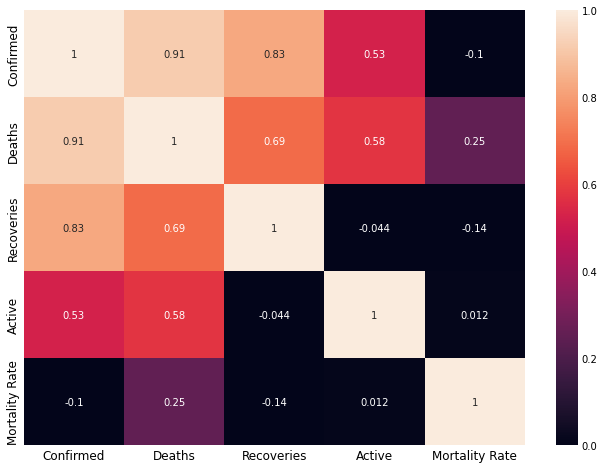

In [34]:
# Correlation matrix of Continenal_df
corr_matrix = Continental_df.corr()

# Plotting Heatmap
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, annot = True, vmax = 1, vmin = 0)

plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

# Bài toán 13
    Xây dựng biểu đồ hình tròn để so sánh tỷ lệ số ca dương tính, số người chết, số người khỏi bệnh và đang điều trị của 7 lục địa.
    Mỗi trường (xác nhận, tử vong, ...) nên được trình bày trong các biểu đồ hình tròn khác nhau.
    Bạn không được phép sử dụng đoạn mã lặp lại ở đây, hãy thử sử dụng vòng lặp for.
    Mỗi lục địa nên được trình bày bằng các màu sắc khác nhau.

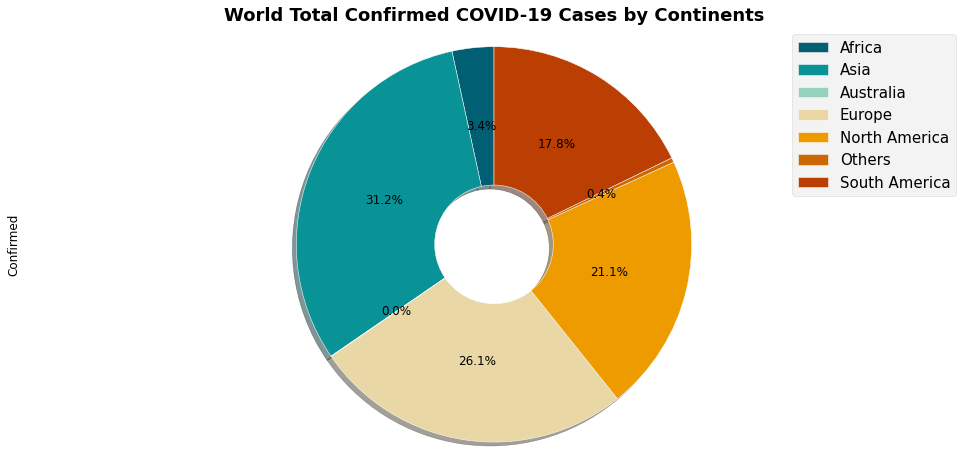

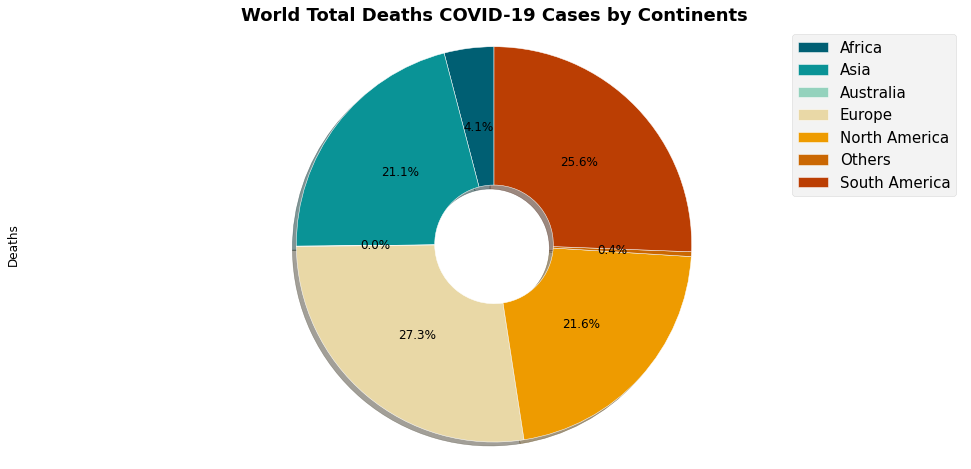

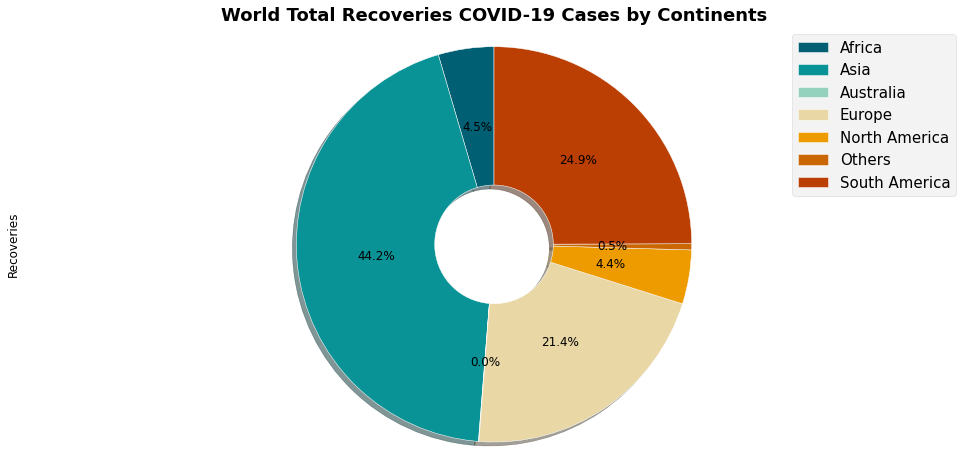

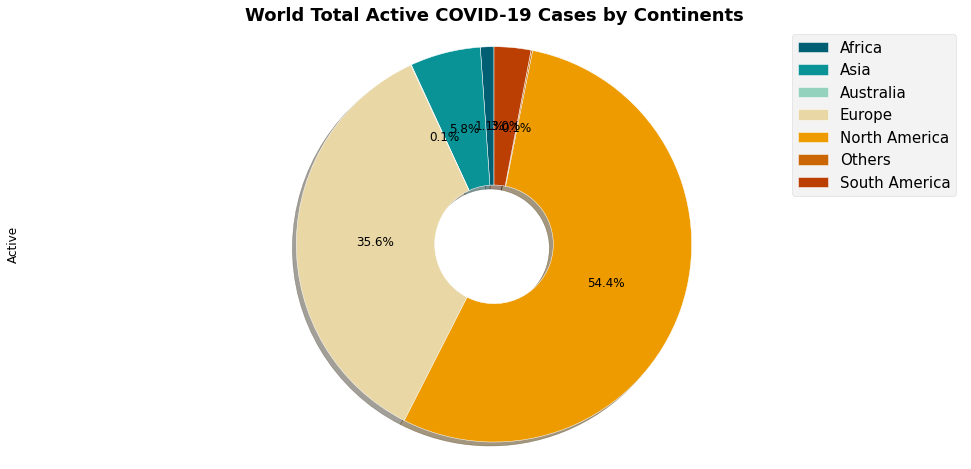

In [35]:
status = list(Continental_df)[0:4]
for i in status:
    #Colors for plot
    colors_list = ["#005F73","#0A9396","#94D2BD","#E9D8A6","#EE9B00","#CA6702","#BB3E03"]
    #Plotting
    Continental_df[i].plot(kind = "pie", figsize = (15,8), autopct = "%1.1f%%",
                           startangle = 90, shadow = True, labels = None,
                           colors = colors_list, grid = True, fontsize = 12,
                           wedgeprops = dict(width = 0.7, edgecolor = "w"))
                                                                  
    plt.legend(labels = Continental_df.index, loc = "upper right", fontsize = 15)
    plt.title("World Total " + i + " COVID-19 Cases by Continents", fontsize = 18, fontweight = "bold")
    plt.axis("equal")
    
    plt.show()

# 6. Phân tích theo quốc gia

# Bài toán 14
    Xây dựng bản đồ folium để hiển thị số người được xác nhận, tử vong, phục hồi và tỷ lệ tử vong của mỗi quốc gia dựa trên vị trí của các quốc gia. Bán kính của hình tròn tỷ lệ thuận với số lượng xác nhận.
![title](problem14.png)

In [36]:
# Insert Lat and Long columns in dataframe country_df
country_df[["Lat","Long"]] = confirmed_df[["Lat", "Long"]].drop_duplicates().groupby(confirmed_df["Country/Region"]).first()

country_df = country_df.reset_index()
# Check NaN values in columns Lat, Long and drop them because location values can't contain NaN values
country_df = country_df.dropna(subset = ["Lat", "Long"])
country_df

,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long
0,Afghanistan,Asia,148933,6836,82586,59511,4.59,33.939110,67.709953
1,Albania,Europe,133310,2457,130314,539,1.84,41.153300,20.168300
2,Algeria,Africa,176724,4404,118409,53911,2.49,28.033900,1.659600
3,Andorra,Europe,14797,128,14380,289,0.87,42.506300,1.521800
4,Angola,Africa,43158,1026,39582,2550,2.38,-11.202700,17.873900
...,...,...,...,...,...,...,...,...,...
196,West Bank and Gaza,Others,317404,3609,312320,1475,1.14,31.952200,35.233200
197,Winter Olympics 2022,Others,0,0,0,0,NaN,39.904200,116.407400
198,Yemen,Asia,7096,1380,4251,1465,19.45,15.552727,48.516388
199,Zambia,Africa,197791,3430,189658,4703,1.73,-13.133897,27.849332


In [39]:
# Plotting world map
world_map = folium.Map(location = [20,0], zoom_start = 2)
# Plotting Folium
for country, lat, long, confirmed, deaths, recoveries, active, mortality_rate in zip (country_df["Country/Region"],
                                                                                        country_df["Lat"],
                                                                                        country_df["Long"],
                                                                                        country_df["Confirmed"],
                                                                                        country_df["Deaths"],
                                                                                        country_df["Recoveries"],
                                                                                        country_df["Active"],
                                                                                        country_df["Mortality Rate"]):
    folium.CircleMarker(radius = confirmed/1000000,
                        color = "orange",
                        fill = "orange",
                        location = [lat, long],
                        popup = ("Country:" + str(country),
                                 "Total cases:" + str(confirmed),
                                 "Total deaths:" + str(deaths),
                                 "Total recoveries:" + str(recoveries),
                                 "Total active:" + str(active),
                                 "Mortality Rate:" + str(mortality_rate)),
                        tooltip = ('<li><bold>Country:'+ str(country),
                                   '<li><bold>Total cases:'+str(confirmed),
                                   '<li><bold>Total deaths:'+str(deaths),
                                   '<li><bold>Total recoveries:'+str(recoveries),
                                   '<li><bold>Total active:'+str(active),
                                   '<li><bold>Mortality Rate:'+str(mortality_rate))).add_to(world_map)
world_map

# Bài toán 15
Xây dựng một bản đồ px [(plotly.express)](https://plotly.com/python/plotly-express/) để hiển thị số lượng hoạt động của mỗi quốc gia trong log(10) dựa trên tên của các quốc gia bằng cách sử dụng màu "spectral" (quang phổ).

In [40]:
# Eliminate value 0 in column "Active" of country_df, because log10(0) is invalid
country_df = country_df.drop(country_df[country_df["Active"] == 0].index)
# Calculate log10 of active cases
country_df["active_log10"] = np.log10(country_df["Active"])
country_df

c:\Users\PhuongNguyen\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning:

invalid value encountered in log10



,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long,active_log10
0,Afghanistan,Asia,148933,6836,82586,59511,4.59,33.939110,67.709953,4.774597
1,Albania,Europe,133310,2457,130314,539,1.84,41.153300,20.168300,2.731589
2,Algeria,Africa,176724,4404,118409,53911,2.49,28.033900,1.659600,4.731677
3,Andorra,Europe,14797,128,14380,289,0.87,42.506300,1.521800,2.460898
4,Angola,Africa,43158,1026,39582,2550,2.38,-11.202700,17.873900,3.406540
...,...,...,...,...,...,...,...,...,...,...
195,Vietnam,Asia,181756,2327,54332,125097,1.28,14.058324,108.277199,5.097247
196,West Bank and Gaza,Others,317404,3609,312320,1475,1.14,31.952200,35.233200,3.168792
198,Yemen,Asia,7096,1380,4251,1465,19.45,15.552727,48.516388,3.165838
199,Zambia,Africa,197791,3430,189658,4703,1.73,-13.133897,27.849332,3.672375


In [64]:
import plotly.express as px

# Plotting
plt.figure(figsize = (15,8))

# Plotting with px.scatter_geo()
fig = px.scatter_geo(country_df, size = "Confirmed", height = 600,
                     lat = "Lat", lon = "Long", color = "active_log10",
                     opacity = 0.9, projection = "natural earth",
                     hover_name = "Country/Region",
                     hover_data = "active_log10")
fig.show()

<Figure size 1080x576 with 0 Axes>

# Bài toán 16
    Lọc 10 quốc gia hàng đầu dựa trên số ca dương tính.

In [42]:
# Sort value of column Confirmed in dataframe country_df
top_10_confirmed = country_df.sort_values(by = "Confirmed", ascending = False).set_index("Country/Region").head(10)
top_10_confirmed

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long,active_log10
Country/Region,,,,,,,,,
USA,North America,35460776,611222,0,34849554,1.72,40.000000,-100.000000,7.542197
India,Asia,31812114,426290,30974748,411076,1.34,20.593684,78.962880,5.613922
Brazil,South America,20034407,559944,17771228,1703235,2.79,-14.235000,-51.925300,6.231275
Russia,Europe,6274006,159032,5609682,505292,2.53,61.524010,105.318756,5.703542
France,Europe,6272466,112245,415111,5745110,1.79,3.933900,-53.125800,6.759298
United Kingdom,Europe,5980830,157209,24693,5798928,2.63,18.220600,-63.068600,6.763348
Turkey,Asia,5822487,51767,5478185,292535,0.89,38.963700,35.243300,5.466178
Argentina,South America,4975616,106747,4615834,253035,2.15,-38.416100,-63.616700,5.403181
Colombia,South America,4815063,121695,4615354,78014,2.53,4.570900,-74.297300,4.892173


# Bài toán 17
    Trực quan hóa 10 quốc gia hàng đầu đã được xác nhận với số ca đang điều trị, khỏi bệnh và tử vong bằng cách sử dụng biểu đồ cột chồng.
![title](problem17.png)

In [43]:
top_10_countries = top_10_confirmed[["Active","Deaths","Recoveries"]].reset_index()
top_10_countries

,Country/Region,Active,Deaths,Recoveries
0,USA,34849554,611222,0
1,India,411076,426290,30974748
2,Brazil,1703235,559944,17771228
3,Russia,505292,159032,5609682
4,France,5745110,112245,415111
5,United Kingdom,5798928,157209,24693
6,Turkey,292535,51767,5478185
7,Argentina,253035,106747,4615834
8,Colombia,78014,121695,4615354
9,Spain,4312964,81844,150376


<Figure size 1080x576 with 0 Axes>

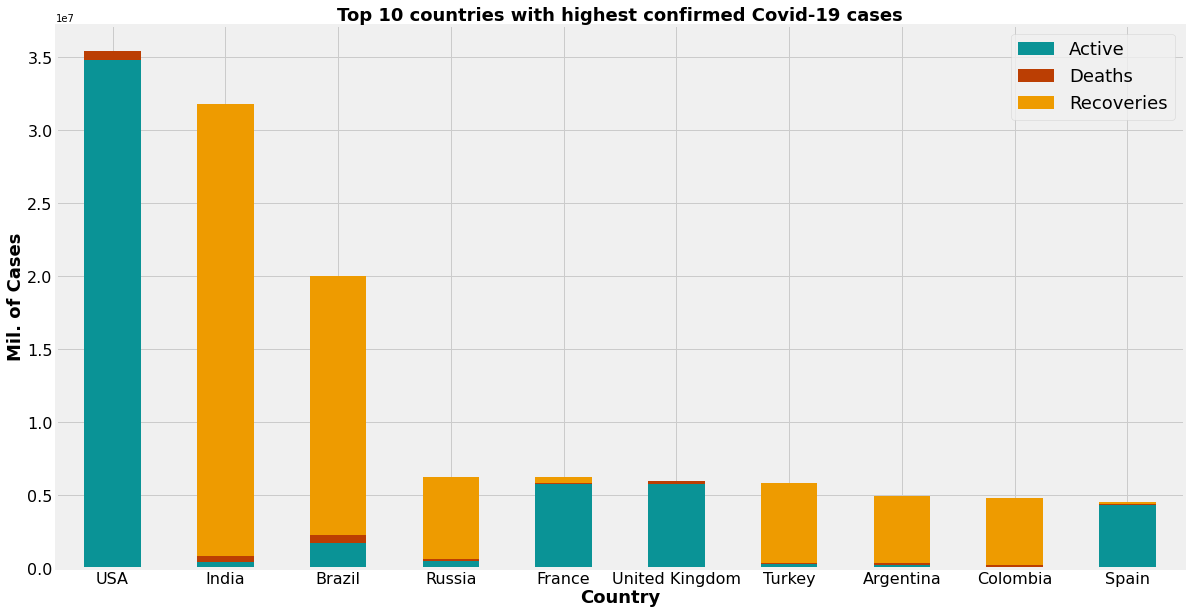

In [44]:
# Plotting
plt.figure(figsize = (15,8))

colors_list = ["#0A9396", "#BB3E03","#EE9B00"]

top_10_countries.plot(x = "Country/Region", 
                      kind = "bar", 
                      stacked=True,
                      figsize = (18,10),
                      color = colors_list)
# Adding title                    
plt.title("Top 10 countries with highest confirmed Covid-19 cases", fontsize = 18, fontweight = "bold", pad = 2.0)                                        
# Customize x-label
plt.xlabel("Country", fontsize = 18, fontweight = "bold", labelpad = 2.0)
plt.xticks(fontsize = 16, rotation = 0)
# Customize y-label
plt.ylabel("Mil. of Cases", fontsize = 18, fontweight = "bold", labelpad = 2.0)
plt.yticks(fontsize = 16)
# Adding legend
plt.legend(loc = "upper right",fontsize = 18)

plt.show()

# 7. Phân tích nâng cao


# Bài toán 18
    Dựa trên dữ liệu trực quan trên toàn cầu, dịch COVID 2019 trên thế giới đã đạt đến đỉnh điểm chưa?
    Đặt câu trả lời của bạn ở đây:
     

Dựa trên dữ liệu trực quan toàn cầu về đại dịch Covid-19 trong giai đoạn 2020-2021, ta có thể nhận thấy đại dịch chưa đạt đến đỉnh điểm. Quan sát dựa theo biểu đồ đường (bài toán 2) về tổng số ca nhiễm covid, có thể nhận thấy biểu đồ chưa có tạo đỉnh và vẫn có xu hướng tăng rõ rệt. Tuy nhiên, xu hướng tăng này có tốc độ chậm hơn (dựa trên biểu đồ đường log10). Điều này cho thấy, đại dịch có thể đang gần đến giai đoạn đạt đỉnh. 

Dựa trên dữ liệu trực quan về đại dịch Covid 19 theo từng châu lục (Biểu đồ đường bài 11 và biểu đồ tròn bài 13), Nam Mĩ là châu lục tiến gần đến giai đoạn đạt đỉnh nhất. Theo biểu đồ đường bài 11, có thể nhận thấy số lượng ca nhiễm covid tại Nam Mĩ có xu hướng tăng rất chậm và biểu đồ có thể đang tạo đỉnh.

# Bài toán 19:
Dựa trên hình ảnh dữ liệu trên phần lục địa:

    19.1 Châu lục nào có tỷ lệ tử vong cao nhất so với các trường hợp dương tính của các châu lục?

    19.2 Châu lục nào có tỷ lệ lây lan COVID 2019 cao nhất so với các trường hợp dương tính của các châu lục?
    
    19.3 Châu lục nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các lục địa?

(Lưu ý: Tỷ lệ chênh lệch COVID 2019 = Số lượng ca mới được xác nhận trong 10 ngày qua / số ca dương tính trước đó).
Đặt câu trả lời của bạn ở đây:


In [45]:
# 19.1: 
# Sorting "Mortality Rate" in data frame Continental_df in descending order

Continental_df["Mortality Rate"].sort_values(ascending = False)

continent
South America    3.07
Africa           2.54
Europe           2.23
Others           2.20
North America    2.18
Australia        1.58
Asia             1.44
Name: Mortality Rate, dtype: float64

**South America** là châu lục có tỉ lệ tử vong cao nhất (3.07%) so với các trường hợp dương tính của các châu lục

In [46]:
# 19.2:

# Calculate the infection rate of each continent
# Total confirmed cases in 8/4/2021
confirmed_8421 = confirmed_df.iloc[:,-1].groupby(confirmed_df["continent"]).sum() 
# Total confirmed cases in 7/25/2021
confirmed_72521 = confirmed_df.iloc[:,-11].groupby(confirmed_df["continent"]).sum()

# Data frame about confirmed cases in 10 days
confirmed_10days = pd.concat([confirmed_8421,confirmed_72521], axis = 1)
# Calculate infection rate in 10 days
confirmed_10days["Infection Rate"] = round(((confirmed_10days["8/4/21"] - confirmed_10days["7/25/21"])/confirmed_10days["7/25/21"])*100,2) 
confirmed_10days["Infection Rate"].sort_values(ascending = False)                     

continent
Australia        17.25
Others            6.92
Africa            5.98
Asia              4.24
North America     2.93
Europe            2.43
South America     1.75
Name: Infection Rate, dtype: float64

Australia là châu lục có tỉ lệ lây nhiễm cao nhất lên tới 17.25%

In [47]:
# 19.3
# Calculate recovered rate of each continent
Continental_df["Recoveries Rate"] = round((Continental_df["Recoveries"]/Continental_df["Confirmed"])*100,2)
Continental_df["Recoveries Rate"].sort_values(ascending = False)

continent
Asia             92.51
South America    91.42
Africa           86.87
Others           86.87
Australia        61.43
Europe           53.28
North America    13.64
Name: Recoveries Rate, dtype: float64

Châu Á là châu lục có tỉ lệ hồi phục cao nhất với 92.51%.

# Bài toán 20
Dựa trên trực quan hóa dữ liệu theo quốc gia:

    20.1Quốc gia nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các quốc gia?

    20.2 Quốc gia nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu các quốc gia?
    
    20.3 Quốc gia nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các quốc gia?
Nhập câu trả lời của bạn ở đây:

In [48]:
# 20.1
# Sort mortality rate in data frame country_df in descending order
country_df.sort_values(by = "Mortality Rate", ascending = False)

,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long,active_log10
198,Yemen,Asia,7096,1380,4251,1465,19.45,15.552727,48.516388,3.165838
139,Peru,South America,2119068,196673,2086086,-163691,9.28,-9.190000,-75.015200,NaN
115,Mexico,North America,2901094,242547,2270427,388120,8.36,23.634500,-102.552800,5.588966
169,Sudan,Africa,37138,2776,30647,3715,7.47,12.862800,30.217600,3.569959
174,Syria,Asia,26044,1919,22019,2106,7.37,34.802075,38.996815,3.323458
...,...,...,...,...,...,...,...,...,...,...
20,Bhutan,Asia,2540,2,2418,120,0.08,27.514200,90.433600,2.079181
159,Singapore,Asia,65410,39,63357,2014,0.06,1.283300,103.833300,3.304059
91,Kiribati,Australia,2,0,0,2,0.00,-3.370400,-168.734000,0.301030
170,Summer Olympics 2020,Others,299,0,0,299,0.00,35.649100,139.773700,2.475671


Quốc gia có tỉ lệ tử vong cao nhất là Yemen với tỉ lệ tử vong là 19.45%.

In [49]:
# 20.2: 

# Determine infection rate of each country
# Total confirmed cases in 8/4/2021
confirmed_8421 = confirmed_df.iloc[:,-1].groupby(confirmed_df["Country/Region"]).sum() 
# Total confirmed cases in 7/25/2021
confirmed_72521 = confirmed_df.iloc[:,-11].groupby(confirmed_df["Country/Region"]).sum()

confirmed_10days = pd.concat([confirmed_8421,confirmed_72521], axis = 1)
# Infection rate of each country in 10 days
confirmed_10days["Infection Rate"] = round(((confirmed_10days["8/4/21"] - confirmed_10days["7/25/21"])/confirmed_10days["7/25/21"])*100,2) 
confirmed_10days.sort_values("Infection Rate", ascending = False)             

,8/4/21,7/25/21,Infection Rate
Country/Region,,,
Summer Olympics 2020,299,91,228.57
Vietnam,181756,101173,79.65
Tanzania,1017,609,67.00
Laos,7305,4762,53.40
Fiji,33920,23139,46.59
...,...,...,...
Nauru,0,0,NaN
Palau,0,0,NaN
Tonga,0,0,NaN


Vùng có tỉ lệ lây lan dịch bệnh cao nhất là Summer Olympics 2020 vơi tỉ lệ là 228,57%

In [50]:
# 20.3: Determine recovered rate of each country and sort it in descending order
country_df["Recoveries Rate"] = round((country_df["Recoveries"]/country_df["Confirmed"])*100,2)
country_df.sort_values("Recoveries Rate", ascending = False)

,Country/Region,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate,Lat,Long,active_log10,Recoveries Rate
63,Gabon,Africa,25440,165,25228,47,0.65,-0.803700,11.609400,1.672098,99.17
13,Bahrain,Asia,269617,1384,267220,1013,0.51,26.027500,50.550000,3.005609,99.11
143,Qatar,Asia,226874,601,224285,1988,0.26,25.354800,51.183900,3.298416,98.86
16,Belarus,Europe,449302,3494,443417,2391,0.78,53.709800,27.953400,3.378580,98.69
73,Guyana,South America,22643,549,22327,-233,2.42,4.860416,-58.930180,NaN,98.60
...,...,...,...,...,...,...,...,...,...,...,...
91,Kiribati,Australia,2,0,0,2,0.00,-3.370400,-168.734000,0.301030,0.00
172,Sweden,Europe,1102829,14657,0,1088172,1.33,60.128161,18.643501,6.036698,0.00
17,Belgium,Europe,1132934,25258,0,1107676,2.23,50.833300,4.469936,6.044413,0.00
170,Summer Olympics 2020,Others,299,0,0,299,0.00,35.649100,139.773700,2.475671,0.00


Gabon là quốc gia có tỉ lệ hồi phục cao nhất với 99.17%

# Bài toán 21
**Tập dữ liệu USA**

In [51]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

Dựa trên dữ liệu của Mỹ:

    21.1 Tiểu bang nào có tỷ lệ tử vong cao nhất trong tập dữ liệu của các tiểu bang?
    21.2 Tiểu bang nào có tỷ lệ lan truyền COVID 2019 cao nhất trong tập dữ liệu của các tiểu bang?
    
    21.3 Tiểu bang nào có tỷ lệ khỏi bệnh cao nhất trong tập dữ liệu của các tiểu bang?

In [52]:
# Overview of data
us_medical_data

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44932,1007,22082.0,21843.0,1,...,NaN,2914.0,NaN,84000001.0,USA,NaN,6.493159,2020-07-06,663719.0,2.241164
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1184,16,548.0,620.0,2,...,NaN,NaN,NaN,84000002.0,USA,1.691666e+04,NaN,2020-07-06,123753.0,1.351351
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,NaN,60,...,NaN,NaN,NaN,16.0,ASM,1.250876e+03,NaN,2020-07-06,696.0,NaN
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,...,NaN,5188.0,NaN,84000004.0,USA,8.488323e+03,5.113597,2020-07-06,873294.0,1.802770
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,...,NaN,1575.0,NaN,84000005.0,USA,1.143109e+04,6.494042,2020-07-06,344968.0,1.203975
5,California,US,2020-07-07 04:34:13,36.1162,-119.6816,284348,6369,NaN,NaN,6,...,NaN,NaN,NaN,84000006.0,USA,1.213132e+04,NaN,2020-07-06,4793353.0,2.233000
6,Colorado,US,2020-07-07 04:34:13,39.0598,-105.3111,39062,1752,4603.0,27963.0,8,...,NaN,5565.0,NaN,84000008.0,USA,6.175921e+03,16.252921,2020-07-06,355655.0,4.936217
7,Connecticut,US,2020-07-07 04:34:13,41.5978,-72.7554,46976,4338,8210.0,34428.0,9,...,NaN,10411.0,NaN,84000009.0,USA,1.470748e+04,22.162381,2020-07-06,524364.0,9.234503
8,Delaware,US,2020-07-07 04:34:13,39.3185,-75.5071,12293,572,6778.0,4943.0,10,...,177990.0,NaN,NaN,84000010.0,USA,1.827856e-06,NaN,2020-07-06,127179.0,4.653055
9,Diamond Princess,US,2020-07-07 04:34:13,NaN,NaN,49,0,NaN,NaN,88888,...,NaN,NaN,NaN,84088888.0,USA,NaN,NaN,2020-07-06,NaN,0.000000


In [53]:
# 21.1: Find the State with highest mortality rate in USA
us_medical_data.sort_values("Mortality_Rate", ascending = False).head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Total_Test_Results,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate
7,Connecticut,US,2020-07-07 04:34:13,41.5978,-72.7554,46976,4338,8210.0,34428.0,9,...,NaN,10411.0,NaN,84000009.0,USA,14707.483577,22.162381,2020-07-06,524364.0,9.234503
34,New Jersey,US,2020-07-07 04:34:13,40.2989,-74.5210,174766,15229,30729.0,128808.0,34,...,NaN,20237.0,NaN,84000034.0,USA,17441.745786,11.656519,2020-07-06,1549209.0,8.713937
26,Michigan,US,2020-07-07 04:34:13,43.3266,-84.5361,73267,6221,52841.0,14205.0,26,...,1177247.0,NaN,NaN,84000026.0,USA,0.000001,NaN,2020-07-06,1159363.0,8.490862
36,New York,US,2020-07-07 04:34:13,42.1657,-74.9481,397649,32057,71040.0,294552.0,36,...,4288131.0,89995.0,NaN,84000036.0,USA,22042.910293,22.631768,2020-07-06,4288131.0,8.061632
25,Massachusetts,US,2020-07-07 04:34:13,42.2302,-71.5301,110137,8198,93157.0,8782.0,25,...,1168234.0,11469.0,NaN,84000025.0,USA,0.000002,10.413394,2020-07-06,899417.0,7.443457


Tiểu bang **Connecticut** là tiểu bang có tỉ lệ tử vong cao nhất với 9.234%

In [54]:
# 21.2: Find the State with highest infection rate in USA
us_medical_data["Infection_Rate"] = (us_medical_data["Confirmed"]/us_medical_data["People_Tested"])*100
us_medical_data.sort_values("Infection_Rate", ascending = False).head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate,Infection_Rate
25,Massachusetts,US,2020-07-07 04:34:13,42.2302,-71.5301,110137,8198,93157.0,8782.0,25,...,11469.0,NaN,84000025.0,USA,0.000002,10.413394,2020-07-06,899417.0,7.443457,12.245377
24,Maryland,US,2020-07-07 04:34:13,39.0639,-76.8021,69904,3246,5029.0,61629.0,24,...,11096.0,NaN,84000024.0,USA,0.000001,15.873198,2020-07-06,587361.0,4.643511,11.901369
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,...,5188.0,NaN,84000004.0,USA,8488.322873,5.113597,2020-07-06,873294.0,1.802770,11.617508
34,New Jersey,US,2020-07-07 04:34:13,40.2989,-74.5210,174766,15229,30729.0,128808.0,34,...,20237.0,NaN,84000034.0,USA,17441.745786,11.656519,2020-07-06,1549209.0,8.713937,11.280983
6,Colorado,US,2020-07-07 04:34:13,39.0598,-105.3111,39062,1752,4603.0,27963.0,8,...,5565.0,NaN,84000008.0,USA,6175.921244,16.252921,2020-07-06,355655.0,4.936217,10.983116


Để xác định tỉ lệ lan truyền Covid-19, ta lấy dữ liệu số ca xác nhận bị Covid được update vào ngày 07-07-2020 từ cột `Confirmed` chia cho tổng số người đã làm test vào ngày 06-07-2020 từ cột `People_Tested`. Kết quả được thể hiện trong cột `Infection_Rate`

Kết quả nhận được là bang **Masachusetts** là tiểu bang có tỉ lệ lây truyền Covid cao nhất với 12.245%

In [55]:
# 21.3: Find the State with highest recovered rate in USA
us_medical_data["Recoveries_Rate"] = (us_medical_data["Recovered"]/us_medical_data["Confirmed"])*100
us_medical_data.sort_values("Recoveries_Rate", ascending = False).head()


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate,Infection_Rate,Recoveries_Rate
27,Minnesota,US,2020-07-07 04:34:13,45.6945,-93.9002,38569,1511,33907.0,3151.0,27,...,NaN,84000027.0,USA,12052.080703,10.938837,2020-07-06,679693.0,3.917654,5.674474,87.912572
38,North Dakota,US,2020-07-07 04:34:13,47.5289,-99.7840,3899,80,3350.0,419.0,38,...,NaN,84000038.0,USA,14904.561571,6.365290,2020-07-06,113582.0,2.078462,3.432762,85.919467
47,South Dakota,US,2020-07-07 04:34:13,44.2998,-99.4388,7105,97,6063.0,945.0,46,...,NaN,84000046.0,USA,0.000001,9.739620,2020-07-06,84303.0,1.365236,8.427933,85.334272
25,Massachusetts,US,2020-07-07 04:34:13,42.2302,-71.5301,110137,8198,93157.0,8782.0,25,...,NaN,84000025.0,USA,0.000002,10.413394,2020-07-06,899417.0,7.443457,12.245377,84.582838
51,Vermont,US,2020-07-07 04:34:13,44.0459,-72.7107,1251,56,1022.0,173.0,50,...,NaN,84000050.0,USA,11274.717984,NaN,2020-07-06,70353.0,4.476419,1.778176,81.694644


Tiểu bang **Minnesota** là tiểu bang có tỉ lệ hồi phục cao nhất với 87.913%

# Bài toán 22
Xây dựng mô hình hồi quy (hoặc nhiều hơn 1 mô hình) để dự đoán số trường hợp Deaths trong các bang New York, Florida, Texas, California tại Hoa Kỳ dựa trên số ca Confirmed. Điều này có nghĩa sẽ sử dụng dữ liệu của các bang còn lại để làm bộ data train mô hình và sử dụng dữ liệu của 4 bang New York, Florida, Texas, California để làm bộ test cho mô hình

Để xây dựng mô hình Linear Regression dự đoán trường hợp Deaths dựa trên số ca Confirmed, ta sử dụng dữ liệu từ hai cột `Confirmed` và `People_Tested` trong dataframe `us_medical_data`.

In [194]:
# Install package scikit-learn 
!pip install scikit-learn

You should consider upgrading via the 'C:\Users\PhuongNguyen\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.



  Using cached scikit_learn-1.3.2-cp310-cp310-win_amd64.whl (9.3 MB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)


In [56]:
from sklearn import linear_model        # Import modul linear_model

In [57]:
# Dataframe: Use columns "Province_State", "People_Tested" and "Confirmed" to create new data frame for building model
data = us_medical_data[["Province_State","People_Tested", "Confirmed"]]
data

,Province_State,People_Tested,Confirmed
0,Alabama,663719.0,44932
1,Alaska,123753.0,1184
2,American Samoa,696.0,0
3,Arizona,873294.0,101455
4,Arkansas,344968.0,24253
5,California,4793353.0,284348
6,Colorado,355655.0,39062
7,Connecticut,524364.0,46976
8,Delaware,127179.0,12293
9,Diamond Princess,NaN,49


In [58]:
# test_data includes data of States Texas, New York, California and Florida
test_data = data[us_medical_data["Province_State"].isin(["New York","Florida","Texas","California"])]
test_data

,Province_State,People_Tested,Confirmed
5,California,4793353.0,284348
11,Florida,3559399.0,206447
36,New York,4288131.0,397649
49,Texas,2163729.0,204710


In [59]:
# train_data includes data of others
train_data = data.drop(test_data.index)
# train_data contains NaN values in column "People_Tested", so these values should be eliminated.
train_data = train_data.dropna(subset = ["People_Tested"], how = "all")
train_data

,Province_State,People_Tested,Confirmed
0,Alabama,663719.0,44932
1,Alaska,123753.0,1184
2,American Samoa,696.0,0
3,Arizona,873294.0,101455
4,Arkansas,344968.0,24253
6,Colorado,355655.0,39062
7,Connecticut,524364.0,46976
8,Delaware,127179.0,12293
10,District of Columbia,107650.0,10515
12,Georgia,958953.0,97064


Linear Regression model: **Confirmed(y) = b_0 + b_1 * People_Tested(x)**

In [60]:
# Use train_data to create linear regression model

# Determine variable x and y in train_data
x_train = np.array(train_data["People_Tested"]).reshape(-1,1)
y_train = np.array(train_data["Confirmed"]).reshape(-1,1)

# Linear Regression model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

# Results of coefficients
b_1 = regr.coef_
b_0 = regr.intercept_

print("Coefficients: b_1 = ", regr.coef_)
print("Intercept: b_0 = ", regr.intercept_)

Coefficients: b_1 =  [[0.09171887]]
Intercept: b_0 =  [-5676.42972596]


In [61]:
# Predict Confirmed cases based on linear regression model
y_predict_train = regr.predict(x_train)
y_predict_train

array([[ 55199.1240353 ],
       [  5674.0550494 ],
       [ -5612.59339549],
       [ 74421.10529471],
       [ 25963.64390447],
       [ 26943.8434212 ],
       [ 42417.64151875],
       [  5988.28388297],
       [  4197.10615655],
       [ 82277.65160366],
       [ -4250.29308465],
       [  2124.99354477],
       [  4088.4193008 ],
       [157946.54119853],
       [ 42621.99115132],
       [ 25091.76436802],
       [ 12870.86755806],
       [ 31042.48436854],
       [ 68950.16668016],
       [  4371.3720012 ],
       [ 48195.65489534],
       [ 76817.07722094],
       [100659.02945979],
       [ 56664.24119449],
       [ 23186.39665391],
       [ 33464.13757714],
       [  3763.82623542],
       [ 11909.74556537],
       [ 22892.25425191],
       [  9614.20579698],
       [136415.26234089],
       [ 28723.0976951 ],
       [ 90797.69218642],
       [  4741.18246732],
       [ -4922.6840884 ],
       [ 75165.6790457 ],
       [ 27814.805769  ],
       [ 18878.63669299],
       [ 877

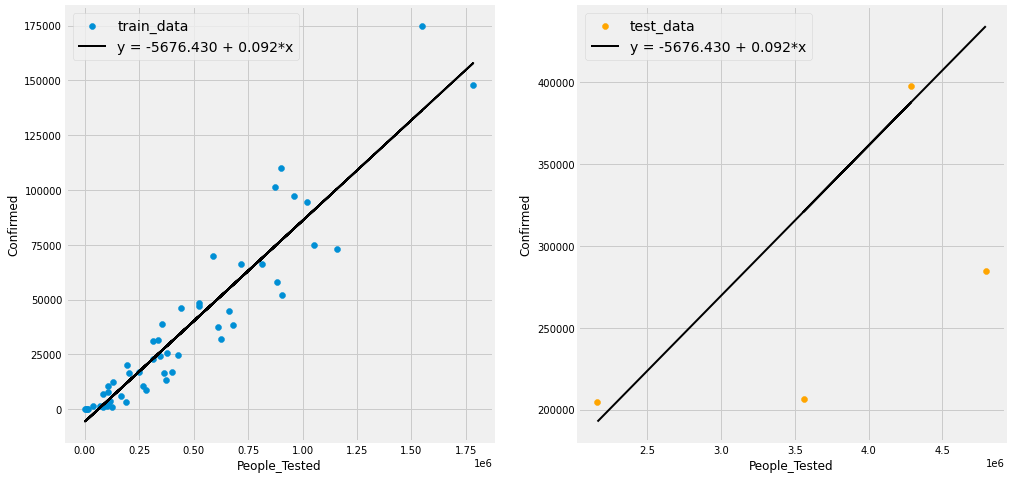

In [62]:
plt.figure(figsize = (15,8))
# Subplot 1: Scatter plot of train_data and fitting line
plt.subplot(121)
plt.scatter(x_train, y_train)                                           # Scatter plot for training data
plt.plot(x_train, y_predict_train, color = "black", linewidth = 2)      # Adding fitting line

# Adding labels
plt.xlabel("People_Tested")
plt.ylabel("Confirmed")

# Adding legends
plt.legend(["train_data","y = -5676.430 + 0.092*x"], fontsize = 14)

# Subplot 2: Scatter plot of test_data and fitting line
# Determine x and y values in test_data
x_test = np.array(test_data["People_Tested"]).reshape(-1, 1)
y_test = np.array(test_data["Confirmed"]).reshape(-1, 1)
y_predict_test = regr.predict(x_test)                    # Predicted y values in test_data

# Plotting
plt.subplot(122)                              
plt.scatter(x_test, y_test, color = "orange",)                         # Scatter plot for test_data
plt.plot(x_test, y_predict_test, color = "black",linewidth = 2)        # Adding fitting line

# Adding labels
plt.xlabel("People_Tested")
plt.ylabel("Confirmed")

# Adding legends
plt.legend(["test_data","y = -5676.430 + 0.092*x"], fontsize = 14)

plt.show()